****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('PETR4_2018-07-02_2019-01-31.csv')

In [3]:
data_frame.count()

Start                        17904
End                          17904
NegociatedOffersAmount       17904
TotalTradedQuantity          17904
RSIIndicator                 17904
SMAIndicatorDiff             17904
EMAIndicatorDiff             17904
UpperBollingerBand           17904
LowerBollingerBand           17904
MiddleBollingerBand          17904
MACD                         17904
AroonUpIndicator             17904
AroonDownIndicator           17904
AroonIndicator               17904
PlusDirectionalIndicator     17904
MinusDirectionalIndicator    17904
ADXIndicator                 17904
CCI                          17904
CMO                          17904
ROC                          17904
BuySignal                    17904
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.5563002680965148

In [5]:
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal
0,02/07/2018 11:26:00,02/07/2018 11:29:00,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,...,42.857143,21.428571,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1
1,02/07/2018 11:29:00,02/07/2018 11:32:00,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,...,35.714286,14.285714,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1
2,02/07/2018 11:32:00,02/07/2018 11:35:00,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,...,28.571429,7.142857,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1
3,02/07/2018 11:35:00,02/07/2018 11:38:00,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,...,21.428571,7.142857,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,0
4,02/07/2018 11:38:00,02/07/2018 11:41:00,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,...,14.285714,28.571429,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1


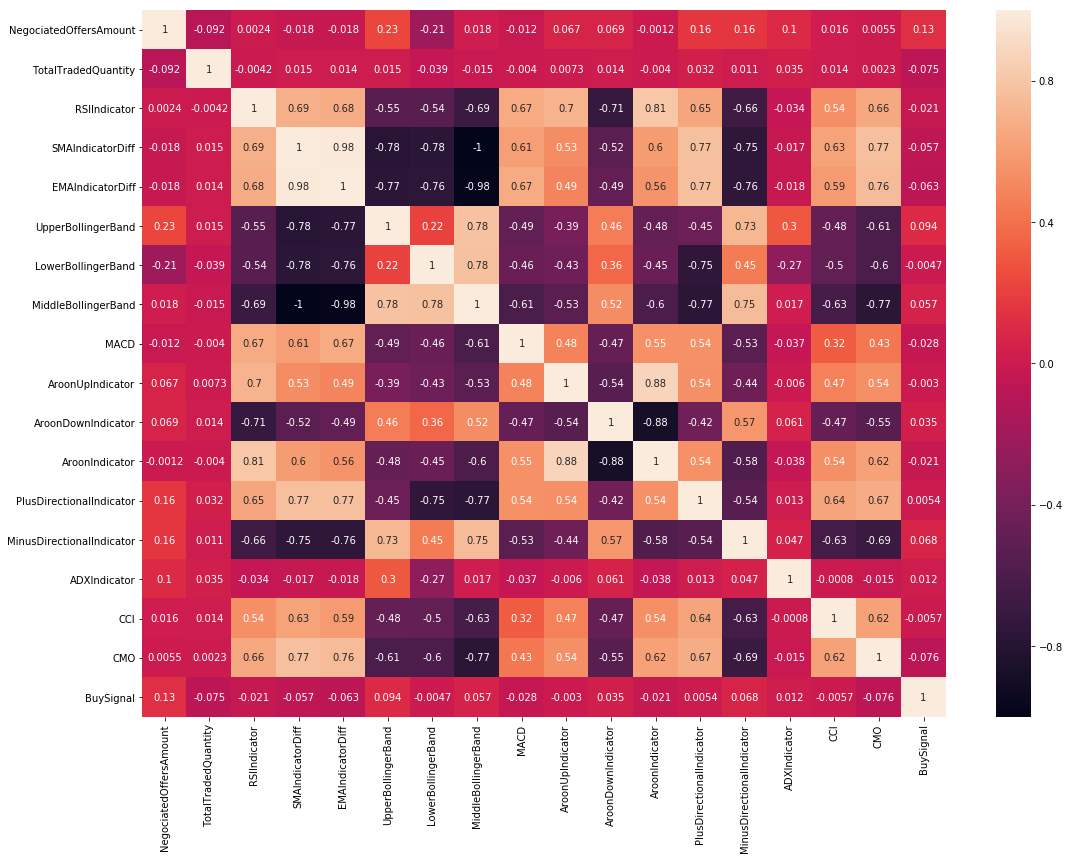

In [6]:
temp = data_frame.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
x_train = data_frame.drop(["Start", "End"], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal
0,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,21.428571,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1
1,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,14.285714,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1
2,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,7.142857,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1
3,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,7.142857,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,0
4,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,28.571429,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1


In [8]:
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal
0,4.927254,11.863582,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,21.428571,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1
1,4.897840,11.433882,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,14.285714,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1
2,4.955827,11.675894,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,7.142857,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1
3,5.442418,13.319902,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,7.142857,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,0
4,5.575949,12.736701,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,28.571429,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1


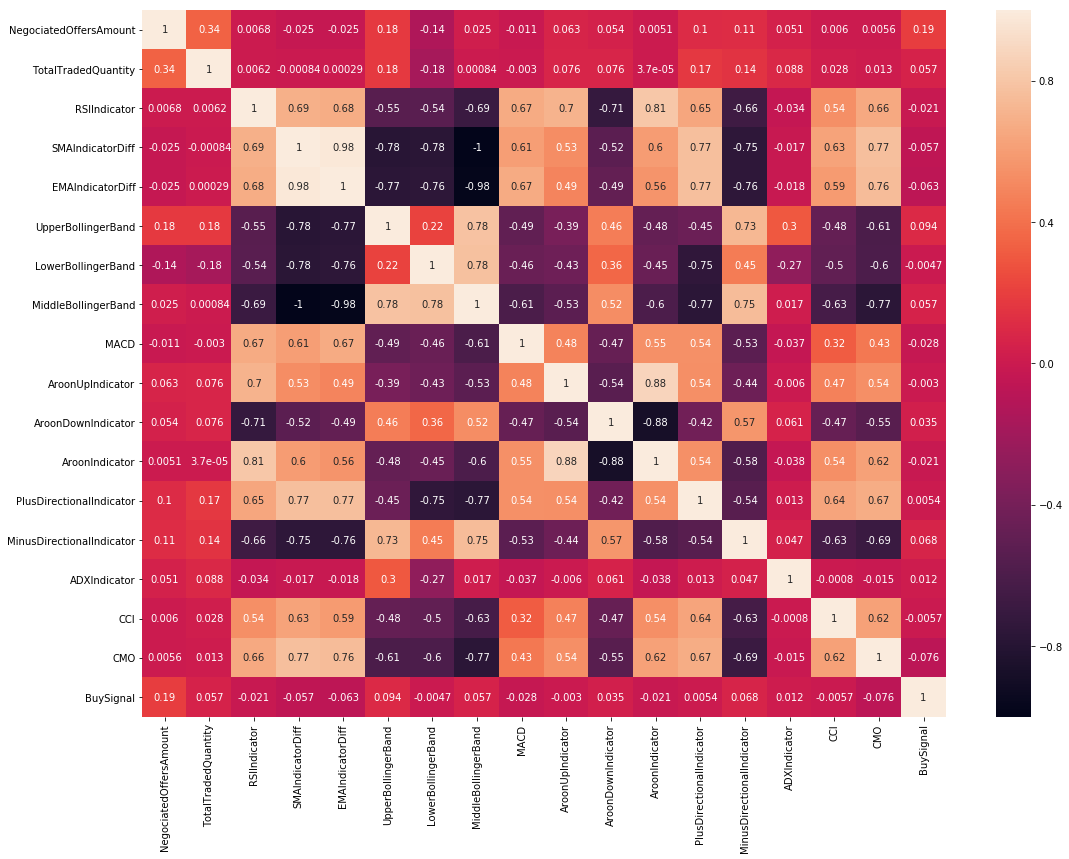

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

temp = x_train.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

x_train = x_train.dropna()
y_train = x_train["BuySignal"]
x_train = x_train.drop(["BuySignal"], axis=1)

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [11]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

average_data_per_day = 120
max_days_interval = 120
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day
days = []
logreg_precisions = []
logreg_recalls = []
mlp_precisions = []
mlp_recalls = []

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
            
            #print("(MiddleRange,MaxRange): (" + str(middle_range) + "," + str (max_range) + ")")
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            new_mlp.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_mlp.predict(x_train[middle_range:max_range])
            
            #print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(y_train[middle_range:max_range], y_predict))
            mlp_recall_arr.append(recall_score(y_train[middle_range:max_range], y_predict))
            
            acc_mlp_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            mlp_score_arr.append(mlp_score)
            
            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_logreg.predict(x_train[middle_range:max_range])
                  
            #print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(y_train[middle_range:max_range], y_predict))
            logreg_recall_arr.append(recall_score(y_train[middle_range:max_range], y_predict))
            
            acc_logreg_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_logreg_score_arr.append(acc_logreg_score)
            logreg_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            logreg_score_arr.append(logreg_score)
      
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
      
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))
    
    logreg_precisions.append(np.sum(logreg_precision_arr)/len(logreg_precision_arr))
    logreg_recalls.append(np.sum(logreg_recall_arr)/len(logreg_recall_arr))
    mlp_precisions.append(np.sum(mlp_precision_arr)/len(mlp_precision_arr))
    mlp_recalls.append(np.sum(mlp_recall_arr)/len(mlp_recall_arr))
    days.append(day)

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.5509337613072658
MLP Average Balanced Accuracy Score: 0.5292655709384626
MLP Average Precision Score: 0.5829895486941967
MLP Average Recall Score: 0.6193775698768957
LogReg Average Accuracy Score: 0.556682229355121
LogReg Average Balanced Accuracy Score: 0.5288312250862192
LogReg Average Precision Score: 0.586710856866668
LogReg Average Recall Score: 0.6308800895481174
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5804886408147278
MLP Average Balanced Accuracy Score: 0.5316743630296671
MLP Average Precision Score: 0.5868005820179687
MLP Average Recall Score: 0.7337075307137338
LogReg Average Accuracy Score: 0.5767405992949471
LogReg Average Balanced Accuracy Score: 0.5395807523932392
LogReg Average Precision Score: 0.598221198494742
LogReg Average Recall Score: 0.6951676566833638
Days used to train: 3
Days to be predicted: 1
MLP Average Accuracy Score: 0.5784974859509021
MLP Averag

MLP Average Accuracy Score: 0.6046321070234114
MLP Average Balanced Accuracy Score: 0.5509408405514012
MLP Average Precision Score: 0.6105541284667076
MLP Average Recall Score: 0.7941480004759235
LogReg Average Accuracy Score: 0.6079152731326645
LogReg Average Balanced Accuracy Score: 0.5526754460520074
LogReg Average Precision Score: 0.6113497837282005
LogReg Average Recall Score: 0.7945085207797162
Days used to train: 21
Days to be predicted: 1
MLP Average Accuracy Score: 0.6034406246489158
MLP Average Balanced Accuracy Score: 0.5493058180611495
MLP Average Precision Score: 0.6091585146670888
MLP Average Recall Score: 0.8013886565952582
LogReg Average Accuracy Score: 0.6060892034602853
LogReg Average Balanced Accuracy Score: 0.550846839731615
LogReg Average Precision Score: 0.6120966399338359
LogReg Average Recall Score: 0.7986114267462339
Days used to train: 22
Days to be predicted: 1
MLP Average Accuracy Score: 0.6023607336956522
MLP Average Balanced Accuracy Score: 0.5466594088447

MLP Average Accuracy Score: 0.6114473168820996
MLP Average Balanced Accuracy Score: 0.5483178419427301
MLP Average Precision Score: 0.6169659211084362
MLP Average Recall Score: 0.8352043232130122
LogReg Average Accuracy Score: 0.610712886799843
LogReg Average Balanced Accuracy Score: 0.5479966456555931
LogReg Average Precision Score: 0.6180934214876039
LogReg Average Recall Score: 0.8303735433065547
Days used to train: 40
Days to be predicted: 1
MLP Average Accuracy Score: 0.6076877470355732
MLP Average Balanced Accuracy Score: 0.5451148931600175
MLP Average Precision Score: 0.6166340011512015
MLP Average Recall Score: 0.8348082885324613
LogReg Average Accuracy Score: 0.6117193675889326
LogReg Average Balanced Accuracy Score: 0.5485987818102686
LogReg Average Precision Score: 0.6195174520151603
LogReg Average Recall Score: 0.8359905908108073
Days used to train: 41
Days to be predicted: 1
MLP Average Accuracy Score: 0.6133559367105438
MLP Average Balanced Accuracy Score: 0.5510031497843

MLP Average Accuracy Score: 0.6152607120352868
MLP Average Balanced Accuracy Score: 0.5433303075523196
MLP Average Precision Score: 0.6238990230245512
MLP Average Recall Score: 0.8702654817522477
LogReg Average Accuracy Score: 0.6138311279143036
LogReg Average Balanced Accuracy Score: 0.5436297262527733
LogReg Average Precision Score: 0.6237581439830227
LogReg Average Recall Score: 0.8738380643937163
Days used to train: 59
Days to be predicted: 1
MLP Average Accuracy Score: 0.6135053352444657
MLP Average Balanced Accuracy Score: 0.5423554532926479
MLP Average Precision Score: 0.6225503809269721
MLP Average Recall Score: 0.8754138021711507
LogReg Average Accuracy Score: 0.6129757923236184
LogReg Average Balanced Accuracy Score: 0.542144196136825
LogReg Average Precision Score: 0.6232764626539609
LogReg Average Recall Score: 0.8748024036099102
Days used to train: 60
Days to be predicted: 1
MLP Average Accuracy Score: 0.6171014492753624
MLP Average Balanced Accuracy Score: 0.5446261030964

MLP Average Accuracy Score: 0.6237095493349215
MLP Average Balanced Accuracy Score: 0.5452563676892004
MLP Average Precision Score: 0.6307425702375065
MLP Average Recall Score: 0.899231355605831
LogReg Average Accuracy Score: 0.6193716497915426
LogReg Average Balanced Accuracy Score: 0.5438892781139424
LogReg Average Precision Score: 0.6305547845059136
LogReg Average Recall Score: 0.8936436006112626
Days used to train: 78
Days to be predicted: 1
MLP Average Accuracy Score: 0.6198721819645733
MLP Average Balanced Accuracy Score: 0.5402906391434155
MLP Average Precision Score: 0.6283035070724193
MLP Average Recall Score: 0.8978511527224305
LogReg Average Accuracy Score: 0.6198721819645733
LogReg Average Balanced Accuracy Score: 0.543699727096447
LogReg Average Precision Score: 0.6307003158080347
LogReg Average Recall Score: 0.895551873328861
Days used to train: 79
Days to be predicted: 1
MLP Average Accuracy Score: 0.6200347009593793
MLP Average Balanced Accuracy Score: 0.542429193796526

MLP Average Accuracy Score: 0.6220209339774557
MLP Average Balanced Accuracy Score: 0.5457358135950842
MLP Average Precision Score: 0.6269583422360656
MLP Average Recall Score: 0.8831066874787307
LogReg Average Accuracy Score: 0.6241814278046163
LogReg Average Balanced Accuracy Score: 0.5513811548629776
LogReg Average Precision Score: 0.6294751462027128
LogReg Average Recall Score: 0.8939860911556279
Days used to train: 97
Days to be predicted: 1
MLP Average Accuracy Score: 0.621178561662565
MLP Average Balanced Accuracy Score: 0.5469233448614714
MLP Average Precision Score: 0.6310249468986536
MLP Average Recall Score: 0.8836067853033223
LogReg Average Accuracy Score: 0.6235370522286027
LogReg Average Balanced Accuracy Score: 0.5506312980003526
LogReg Average Precision Score: 0.6296248900687983
LogReg Average Recall Score: 0.8917424998318056
Days used to train: 98
Days to be predicted: 1
MLP Average Accuracy Score: 0.6243102006688963
MLP Average Balanced Accuracy Score: 0.5508988411437

MLP Average Accuracy Score: 0.6139233954451346
MLP Average Balanced Accuracy Score: 0.5495443522745612
MLP Average Precision Score: 0.6198769356332172
MLP Average Recall Score: 0.8726720792873149
LogReg Average Accuracy Score: 0.6170703933747412
LogReg Average Balanced Accuracy Score: 0.5523186193039459
LogReg Average Precision Score: 0.6201707709129294
LogReg Average Recall Score: 0.8852757976836871
Days used to train: 116
Days to be predicted: 1
MLP Average Accuracy Score: 0.6162936913895993
MLP Average Balanced Accuracy Score: 0.5549458363828975
MLP Average Precision Score: 0.622926404002789
MLP Average Recall Score: 0.8547852425603164
LogReg Average Accuracy Score: 0.614386189258312
LogReg Average Balanced Accuracy Score: 0.550000495423635
LogReg Average Precision Score: 0.6172732927401727
LogReg Average Recall Score: 0.8842183766780141
Days used to train: 117
Days to be predicted: 1
MLP Average Accuracy Score: 0.614262187088274
MLP Average Balanced Accuracy Score: 0.55423713647883

In [16]:
def performance_plot(days, precision, recall, figsize, title, precision_xytextpos, recall_xytextpos):

    plt.figure(1, figsize=figsize)

    plt.subplot(111)
    lines = plt.plot(days, precision, days, recall)
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.legend(('Precisões', 'Realocações'),
            loc='center right')
    plt.title(title)

    xy_precision = (precision.index(max(precision)) + 1, max(precision))
    xy_recall = (recall.index(max(recall)) + 1, max(recall))

    plt.annotate(str(xy_precision), xy=xy_precision, xytext=precision_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_recall), xy=xy_recall, xytext=recall_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.ylim(0.6, 0.95)
    plt.xlim(0,120)
    plt.show()

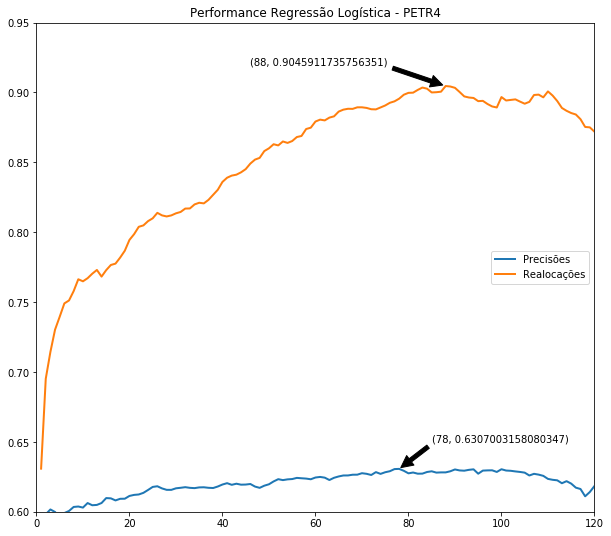

In [17]:
performance_plot(days, logreg_precisions, logreg_recalls, (10,9), 'Performance Regressão Logística - PETR4', (85, 0.65),(46, 0.92))

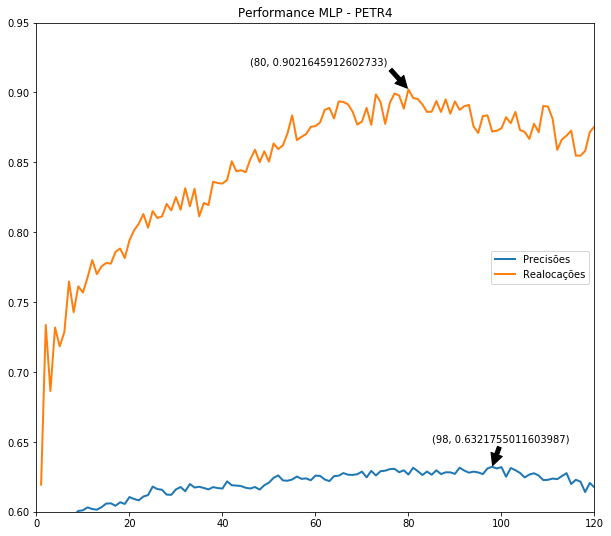

In [18]:
performance_plot(days, mlp_precisions, mlp_recalls, (10,9), 'Performance MLP - PETR4', (85, 0.65),(46, 0.92))